## Embeddings en OpenAI usando el modelo : text-embedding-ada-002

In [1]:
import openai
import os
import getpass

In [9]:
openai.api_key = getpass.getpass("Ingresa tu API Key de OpenAI : ")

In [4]:
def generate_embedding_openai(text, model = "text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = text, model = model)['data'][0]['embedding']

In [5]:
embedding = generate_embedding_openai("Me gusta la comida china")

In [6]:
embedding

[-0.0007321368320845068,
 -0.004849455319344997,
 0.003138599218800664,
 -0.0006084651104174554,
 -0.024158993735909462,
 -0.01332154218107462,
 -0.016938084736466408,
 -0.022783003747463226,
 0.0037109139375388622,
 -0.03095371089875698,
 0.0183993149548769,
 0.014039980247616768,
 0.010350375436246395,
 -0.012444804422557354,
 -0.011141874827444553,
 0.009236187674105167,
 0.030417926609516144,
 -0.008779553696513176,
 0.020018843933939934,
 -0.008292477577924728,
 -0.01522114034742117,
 0.018472375348210335,
 0.010855717584490776,
 -0.020810343325138092,
 -0.01889856718480587,
 0.010119014419615269,
 0.010417348705232143,
 -0.008268123492598534,
 0.005826652515679598,
 -0.004143194295465946,
 0.040329933166503906,
 0.0041371057741343975,
 -0.007537508849054575,
 -0.0053000012412667274,
 0.007872373796999454,
 -0.017437338829040527,
 -0.022916948422789574,
 -0.01995795965194702,
 -0.0009574097348377109,
 0.002712407149374485,
 0.0023562326095998287,
 0.021260889247059822,
 0.00787237

In [7]:
#Dimensiones del embedding
len(embedding)

1536

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cities = ["Lima", "Cusco", "Berlin", "Paris", "California", "Barcelona", "Miami"]
df = pd.DataFrame({"city" : cities})

# Genera embeddings para cada ciudad utilizando la función 'generate_embedding_openai'
# y almacenar estos embeddings en una nueva columna llamada 'cities_embeddings'.
df["cities_embeddings"] = [generate_embedding_openai(city) for city in cities]

# Inicializa el algoritmo PCA para reducir la dimensionalidad a 3 componentes.
pca = PCA(n_components = 3)

# Aplica PCA a los embeddings de las ciudades y almacenar el resultado en 't'.
t = pca.fit_transform(df['cities_embeddings'].tolist())

# Inicializar una figura para la visualización con un tamaño específico.
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection = "3d")

# Graficar los puntos en 3D usando los resultados de PCA.
ax.scatter(t[:,0], t[:,1], t[:,2])

# Anotar cada punto con el nombre de la ciudad correspondiente.
for i, txt in enumerate(cities):
    ax.text(t[i,0], t[i,1], t[i,2], txt)

plt.show()

## Embeddings usando el modelo : sentence-transformers/all-MiniLM-L6-v2

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["Me gusta la pizza"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

emb1 = model.encode("Me gusta la comida china")
emb2 = model.encode("No me gusta ir a la playa")

In [13]:
len(emb1), len(emb2)

(384, 384)

In [14]:
def generate_embedding_all_MiniLM(text):
   text = text.replace("\n", " ")
   return model.encode(text)

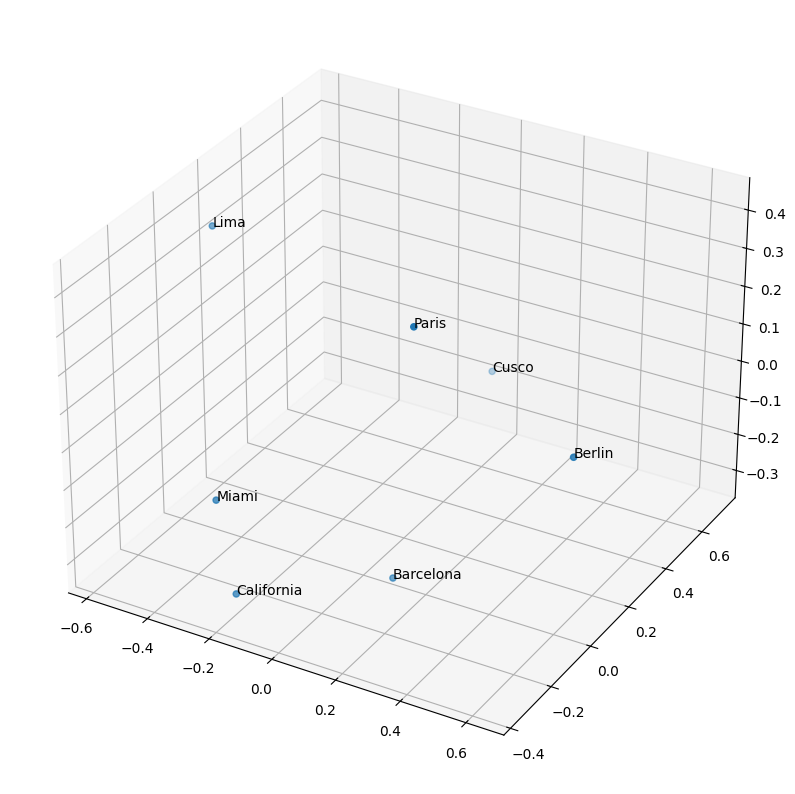

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cities = ["Lima", "Cusco", "Berlin", "Paris", "California", "Barcelona", "Miami"]
df = pd.DataFrame({"city" : cities})

# Genera embeddings para cada ciudad utilizando la función 'generate_embedding_all_MiniLM'
# y almacenar estos embeddings en una nueva columna llamada 'cities_embeddings'.
df["cities_embeddings"] = [generate_embedding_all_MiniLM(city) for city in cities]

# Inicializa el algoritmo PCA para reducir la dimensionalidad a 3 componentes.
pca = PCA(n_components = 3)

# Aplica PCA a los embeddings de las ciudades y almacenar el resultado en 't'.
t = pca.fit_transform(df['cities_embeddings'].tolist())

# Inicializar una figura para la visualización con un tamaño específico.
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection = "3d")

# Graficar los puntos en 3D usando los resultados de PCA.
ax.scatter(t[:,0], t[:,1], t[:,2])

# Anotar cada punto con el nombre de la ciudad correspondiente.
for i, txt in enumerate(cities):
    ax.text(t[i,0], t[i,1], t[i,2], txt)

plt.show()